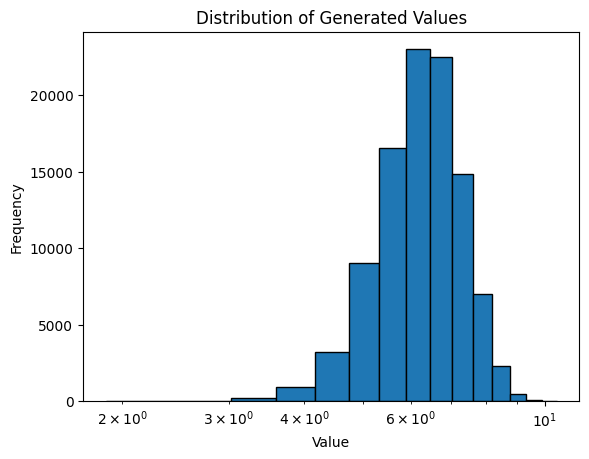

Mean:  915.9235157728325
Median:  591.6218539138797
Std Dev:  1059.9451411604293
Max:  35106.05870395179
Min:  6.542679242248832
10th percentile:  172.54244803423444
25th percentile:  311.95464693024434
75th percentile:  1121.5690671804362


In [61]:
import numpy as np
import matplotlib.pyplot as plt

bankroll = 500
unit = 0.08
my_odds = [0.55, 0.55, 0.55]
results = []
runs = 100000

for _ in range(runs):
    for date in range(1, 52):
        day_profit = 0
        for i in range(len(my_odds)):
            won_bet = np.random.rand() < my_odds[i]
            if won_bet:
                day_profit += (unit * bankroll) * 0.909
            else:
                day_profit -= (unit * bankroll)
        #print(day_profit)
        bankroll += day_profit
        if bankroll <= 0:
            break
    results.append(bankroll)
    bankroll = 500

# make hist bins log scale
plt.hist(np.log(results), bins=15, edgecolor='k')
plt.xscale('log')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Generated Values")
plt.show()

print("Mean: ", np.mean(results))
print("Median: ", np.median(results))
print("Std Dev: ", np.std(results))
print("Max: ", np.max(results))
print("Min: ", np.min(results))
print("10th percentile: ", np.percentile(results, 10))
print("25th percentile: ", np.percentile(results, 25))
print("75th percentile: ", np.percentile(results, 75))



Unit: 0.05
Mean: 732.2851292063245
Median: 615.7291789975013
Std Dev: 464.4844009836187
Min: 31.33225831893935
Max: 7015.886577519188
10th percentile: 288.54614392966977
25th percentile: 416.0835168574454
75th percentile: 912.3024455127553
Broke: 0.00% runs
----------------------------------------
Unit: 0.08
Mean: 916.6331766835666
Median: 591.6218539138799
Std Dev: 1067.6563339204429
Min: 7.964347116865495
Max: 32735.376768580834
10th percentile: 173.79667879902723
25th percentile: 312.07745315981145
75th percentile: 1115.431312962759
Broke: 0.00% runs
----------------------------------------
Unit: 0.1
Mean: 1069.709683343915
Median: 535.6769190864607
Std Dev: 1772.180162579618
Min: 3.122249041694875
Max: 49249.165405619315
10th percentile: 114.63060040618224
25th percentile: 237.55746764909193
75th percentile: 1189.9134447119166
Broke: 0.00% runs
----------------------------------------


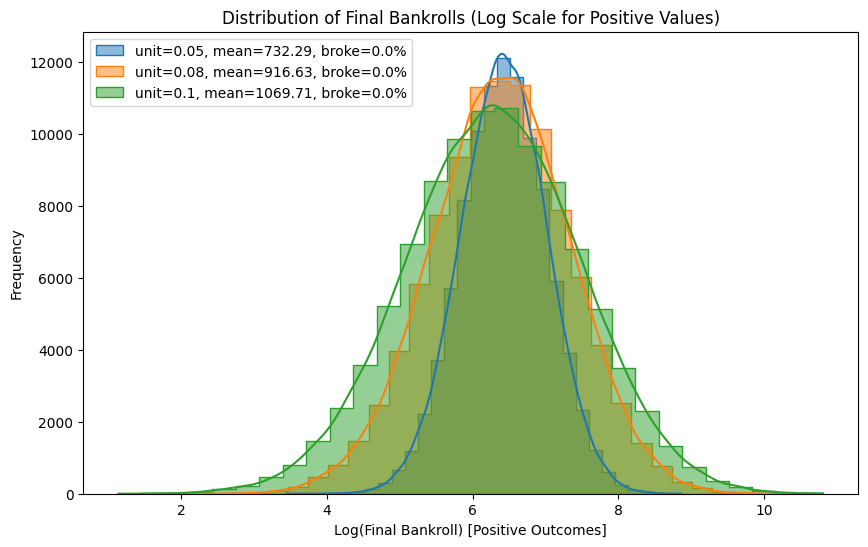

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_season(initial_bankroll=500, unit=0.08, odds=0.55, 
                    n_bets_per_day=3, n_days=51, runs=100000):
    final_bankrolls = np.zeros(runs)
    win_multiplier = 0.909  # -110 odds payout multiplier
    for run in range(runs):
        bankroll = initial_bankroll
        for day in range(n_days):
            day_profit = 0
            for _ in range(n_bets_per_day):
                bet = unit * bankroll
                if np.random.rand() < odds:
                    day_profit += bet * win_multiplier
                else:
                    day_profit -= bet
            bankroll += day_profit
            if bankroll <= 0:
                bankroll = 0
                break
        final_bankrolls[run] = bankroll
    return final_bankrolls

# Simulate for different unit sizes
unit_sizes = [0.05, 0.08, 0.10]
results = {}

plt.figure(figsize=(10,6))
for u in unit_sizes:
    res = simulate_season(unit=u)
    results[u] = res
    mean_val = np.mean(res)
    broke_pct = np.mean(res < 500)*100
    print(f"Unit: {u}")
    print("Mean:", mean_val)
    print("Median:", np.median(res))
    print("Std Dev:", np.std(res))
    print("Min:", np.min(res))
    print("Max:", np.max(res))
    print("10th percentile:", np.percentile(res, 10))
    print("25th percentile:", np.percentile(res, 25))
    print("75th percentile:", np.percentile(res, 75))
    print("Broke: {:.2f}% runs".format(broke_pct))
    print("-"*40)
    
    # For plotting, filter out bankrupt runs (zero) since log scale can't show zeros.
    pos_res = res[res > 0]
    sns.histplot(np.log(pos_res), bins=30, kde=True,
                 label=f'unit={u}, mean={mean_val:.2f}, broke={broke_pct:.1f}%', element="step")

plt.xlabel("Log(Final Bankroll) [Positive Outcomes]")
plt.ylabel("Frequency")
plt.title("Distribution of Final Bankrolls (Log Scale for Positive Values)")
plt.legend()
plt.show()
